VIDEO GAME SALES ANALYSIS

https://www.kaggle.com/datasets/gregorut/videogamesales

In [1]:
#importing modules  # :imp (snippet)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as cnt
#import panel as pn
import seaborn as sns
plt.style.use(style='seaborn-v0_8-darkgrid')
import os, sys
print(os.getcwd())

c:\Users\siavr\OneDrive\Desktop\Python


In [2]:
def getLists(ats): # defining a function, that will create a list of values that I import from SQL
    l = len(ats[0])
    lsts = [[] for i in range(l)]
    for e in ats:
        for i in range(l):
            lsts[i].append(e[i])
    for i in range(l):
        lsts[i] = np.asarray(lsts[i])
    if len(lsts) == 1:
        return lsts[0]
    return lsts

In [3]:
DB = cnt.connect( #connecting to SQL database, all of the names and passwords have been hidden
    host = '',
    user='',
    password='',
    port=****
    )
c=DB.cursor()

In [4]:
c.execute("use game_sales") #using a specific schema, so that I do not have to specify the schema every time

01 | How are global video game sales distributed by region?

In [ ]:
sql='''SELECT SUM(NA_Sales), SUM(EU_Sales), SUM(JP_Sales), SUM(Other_Sales) 
FROM game_sales;'''
all_sales = pd.read_sql_query(sql, con=DB) # selecting the sums of sales from different regions with pandas, reading a SQL query

all_sales.head()

In [6]:
na_sales = all_sales["SUM(NA_Sales)"]/8820.07*100 # calculating the % of all sales (sum of a region / total global sales * 100%), same goes for the next 3 cells

In [7]:
eu_sales = all_sales["SUM(EU_Sales)"]/8820.07*100

In [8]:
jp_sales = all_sales["SUM(JP_Sales)"]/8820.07*100

In [9]:
other_sales = all_sales["SUM(Other_Sales)"]/8820.07*100

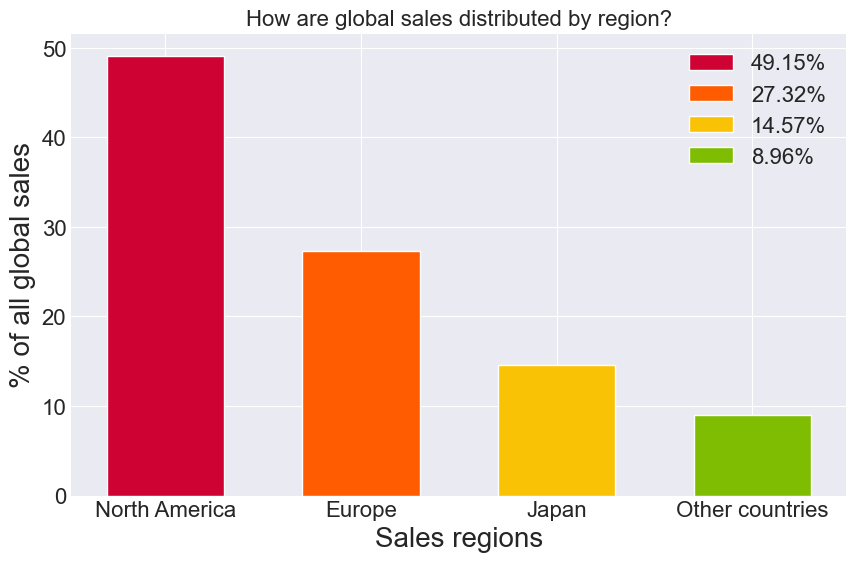

In [10]:
w = 0.6 # creating first bar chart, comparing the % of sales 

fig, ax = plt.subplots(figsize=(10,6))

sns.set_theme(style='darkgrid')

ax.bar("North America", na_sales, label = "49.15%", color = "#cf0234", width = w)
ax.bar("Europe", eu_sales, label = "27.32%", color = "#ff5b00", width = w)
ax.bar("Japan", jp_sales, label = "14.57%", color = "#fac205", width = w)
ax.bar("Other countries", other_sales, label = "8.96%", color = "#7ebd01", width = w)

ax.set_xlabel('Sales regions', fontsize=20)
ax.set_ylabel('% of all global sales', fontsize=20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_title("How are global sales distributed by region?", fontsize = 16)
ax.legend(loc=1, prop={'size': 16})
plt.show()

02 | Do people around the world like to play the same types of games?

In [11]:
sql='''SELECT Genre, ROUND(SUM(NA_Sales),2) 
FROM game_sales
GROUP BY Genre
ORDER BY ROUND(SUM(NA_Sales),2) DESC
LIMIT 5'''
c.execute(sql) # SQL query to select the top game genres in different regions, same goes for the next 3 cells
na_genre = c.fetchall()

genre_na, na_sales = getLists(na_genre)

In [12]:
sql='''SELECT Genre, ROUND(SUM(EU_Sales),2)
FROM game_sales
GROUP BY Genre
ORDER BY ROUND(SUM(EU_Sales),2) DESC
LIMIT 5'''
c.execute(sql)
eu_genre = c.fetchall()

genre_eu, eu_sales = getLists(eu_genre)

In [13]:
sql='''SELECT Genre, ROUND(SUM(JP_Sales),2)
FROM game_sales
GROUP BY Genre
ORDER BY ROUND(SUM(JP_Sales),2) DESC
LIMIT 5'''
c.execute(sql)
jp_genre = c.fetchall()

genre_jp, jp_sales = getLists(jp_genre)

In [14]:
sql='''SELECT Genre, ROUND(SUM(Other_Sales),2)
FROM game_sales
GROUP BY Genre
ORDER BY ROUND(SUM(Other_Sales),2) DESC
LIMIT 5'''
c.execute(sql)
other_genre = c.fetchall()

genre_other, other_sales = getLists(other_genre)

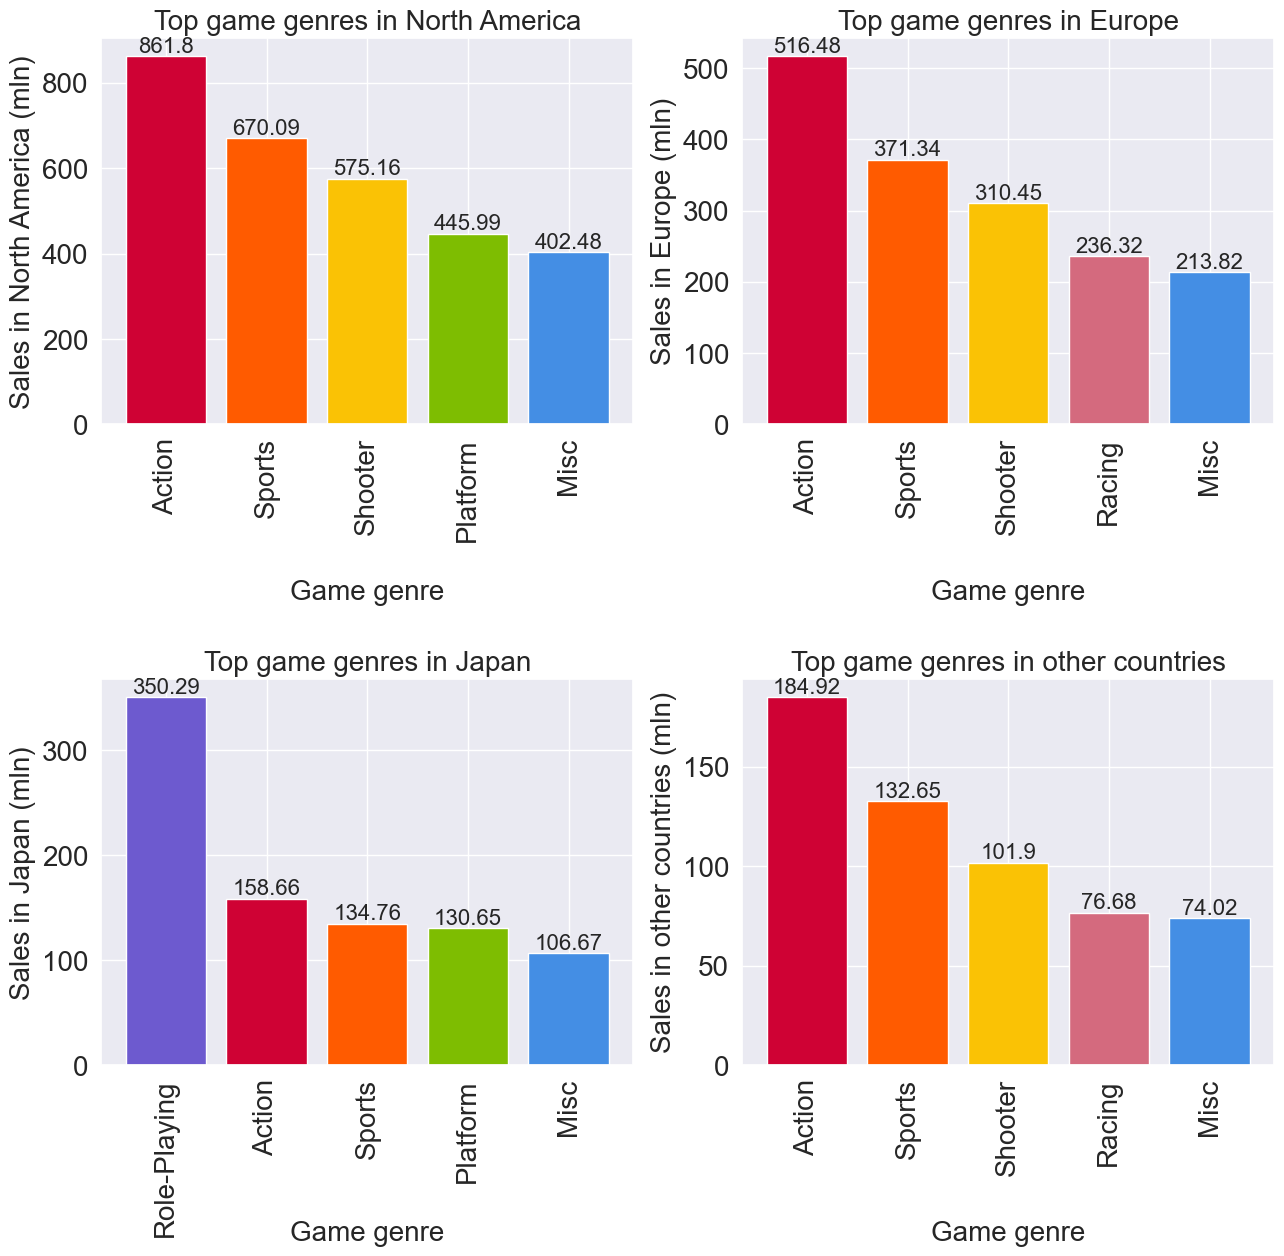

In [15]:
x2 = np.arange(0, 5) # comparing the top game genres around the World
w = 0.8

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(13,13), gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1]})

col1 = ["#cf0234", "#ff5b00", "#fac205", "#7ebd01", "#448ee4"]
col2 = ["#cf0234", "#ff5b00", "#fac205", "#d46a7e", "#448ee4"]
col3 = ["#6d5acf", "#cf0234", "#ff5b00", "#7ebd01", "#448ee4"]
col4 = ["#cf0234", "#ff5b00", "#fac205", "#d46a7e", "#448ee4"]

#ax1:

na = ax1.bar(genre_na, na_sales, width = w, color = col1)
ax1.set_xticks(x2)
ax1.set_xticklabels(genre_na, rotation = 90)

ax1.bar_label(na, fontsize = 16)

ax1.xaxis.set_label_coords(0.5, -0.4)

ax1.set_xlabel('Game genre', fontsize=20)
ax1.set_ylabel('Sales in North America (mln)', fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_title("Top game genres in North America", fontsize = 20)
# ax1.legend(loc=1, prop={'size': 16})


#ax2:

eu = ax2.bar(genre_eu, eu_sales, width = w, color = col2)
ax2.set_xticks(x2)
ax2.set_xticklabels(genre_eu, rotation = 90)

ax2.bar_label(eu, fontsize = 16)

ax2.xaxis.set_label_coords(0.5, -0.4)

ax2.set_xlabel('Game genre', fontsize=20)
ax2.set_ylabel('Sales in Europe (mln)', fontsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_title("Top game genres in Europe", fontsize = 20)
# ax2.legend(loc=1, prop={'size': 16})


#ax3:

jp = ax3.bar(genre_jp, jp_sales, width = w, color = col3)
ax3.set_xticks(x2)
ax3.set_xticklabels(genre_jp, rotation = 90)

ax3.bar_label(jp, fontsize = 16)

ax3.xaxis.set_label_coords(0.5, -0.4)

ax3.set_xlabel('Game genre', fontsize=20)
ax3.set_ylabel('Sales in Japan (mln)', fontsize=20)
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
ax3.set_title("Top game genres in Japan", fontsize = 20)
# ax3.legend(loc=1, prop={'size': 16})


#ax4:

other = ax4.bar(genre_other, other_sales, width = w, color = col4)
ax4.set_xticks(x2)
ax4.set_xticklabels(genre_other, rotation = 90)

ax4.bar_label(other, fontsize = 16)

ax4.xaxis.set_label_coords(0.5, -0.4)

ax4.set_xlabel('Game genre', fontsize=20)
ax4.set_ylabel('Sales in other countries (mln)', fontsize=20)
ax4.tick_params(axis='x', labelsize=20)
ax4.tick_params(axis='y', labelsize=20)
ax4.set_title("Top game genres in other countries", fontsize = 20)
# ax4.legend(loc=1, prop={'size': 16})
fig.tight_layout()
plt.show()

03 | What are the market shares of the top 5 game publishers?

In [16]:
sql='''SELECT Publisher, ROUND((SUM(Global_Sales)/8820.07)*100,2)
FROM game_sales
GROUP BY Publisher
ORDER BY ROUND((SUM(Global_Sales)/8820.07)*100,2) DESC
LIMIT 5;'''
c.execute(sql) # SQL query that calculates the market shares of the top 5 game publishers
all_ms = c.fetchall()

In [17]:
ms_publishers, marketshare = getLists(all_ms) # getting lists of values (publisher name, % of market)
print(ms_publishers)
print(marketshare)

['Nintendo' 'Electronic Arts' 'Activision' 'Sony Computer Entertainment'
 'Ubisoft']
[20.23 12.4   8.18  6.89  5.37]


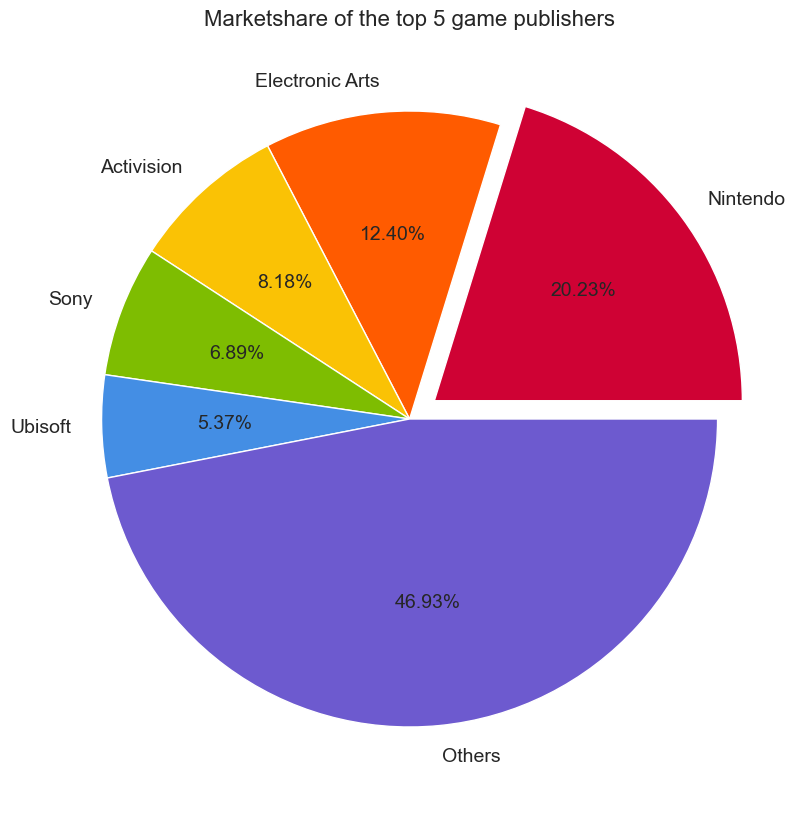

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) # creating a pie chart to showcase the top 5 market shares compared to everyone else

e = [0.1, 0, 0, 0, 0, 0]
xms = [20.23, 12.4, 8.18, 6.89, 5.37, 46.93]
names = ["Nintendo", "Electronic Arts", "Activision", "Sony", "Ubisoft", "Others"]

col = ["#cf0234", "#ff5b00" ,"#fac205", "#7ebd01", "#448ee4", "#6d5acf" ]

ax.pie(xms, labels = names, explode = e, shadow = False, colors = col, autopct = "%.2f%%", textprops={'fontsize': 14})
ax.set_title("Marketshare of the top 5 game publishers", fontsize = 16)

#ax4.legend(loc=1)

plt.show()

04 | How did game sales change for the top 5 publishers from 1980 to 2016?

In [19]:
sql='''SELECT DISTINCT Year
FROM game_sales
ORDER BY Year ASC'''
c.execute(sql) # selecting the years in SQL
years = c.fetchall()

year = getLists(years)

In [20]:
sql='''SELECT year, ROUND(SUM(Global_Sales), 2)
FROM game_sales
WHERE Publisher = "Nintendo"
GROUP BY year
ORDER BY year ASC'''
c.execute(sql) # selecting yearly Nintendo sales 
nintendo = c.fetchall()

nin_year, nintendo_sales = getLists(nintendo)

In [21]:
sql='''SELECT year, ROUND(SUM(Global_Sales), 2)
FROM game_sales
WHERE Publisher = "Electronic Arts"
GROUP BY year
ORDER BY year ASC'''
c.execute(sql) # selecting yearly EA sales 
ea = c.fetchall()

ea_year, ea_sales = getLists(ea)

In [22]:
sql='''SELECT year, ROUND(SUM(Global_Sales), 2)
FROM game_sales
WHERE Publisher = "Activision"
GROUP BY year
ORDER BY year ASC'''
c.execute(sql) # selecting yearly Activision sales 
act = c.fetchall()

act_year, act_sales = getLists(act)

In [23]:
sql='''SELECT year, ROUND(SUM(Global_Sales), 2)
FROM game_sales
WHERE Publisher = "Sony Computer Entertainment"
GROUP BY year
ORDER BY year ASC'''
c.execute(sql) # selecting yearly Sony sales 
sony = c.fetchall()

sony_year, sony_sales = getLists(sony)

In [24]:
sql='''SELECT year, ROUND(SUM(Global_Sales), 2)
FROM game_sales
WHERE Publisher = "Ubisoft"
GROUP BY year
ORDER BY year ASC'''
c.execute(sql) # selecting yearly Ubisoft sales 
ubi = c.fetchall()

ubi_year, ubi_sales = getLists(ubi)

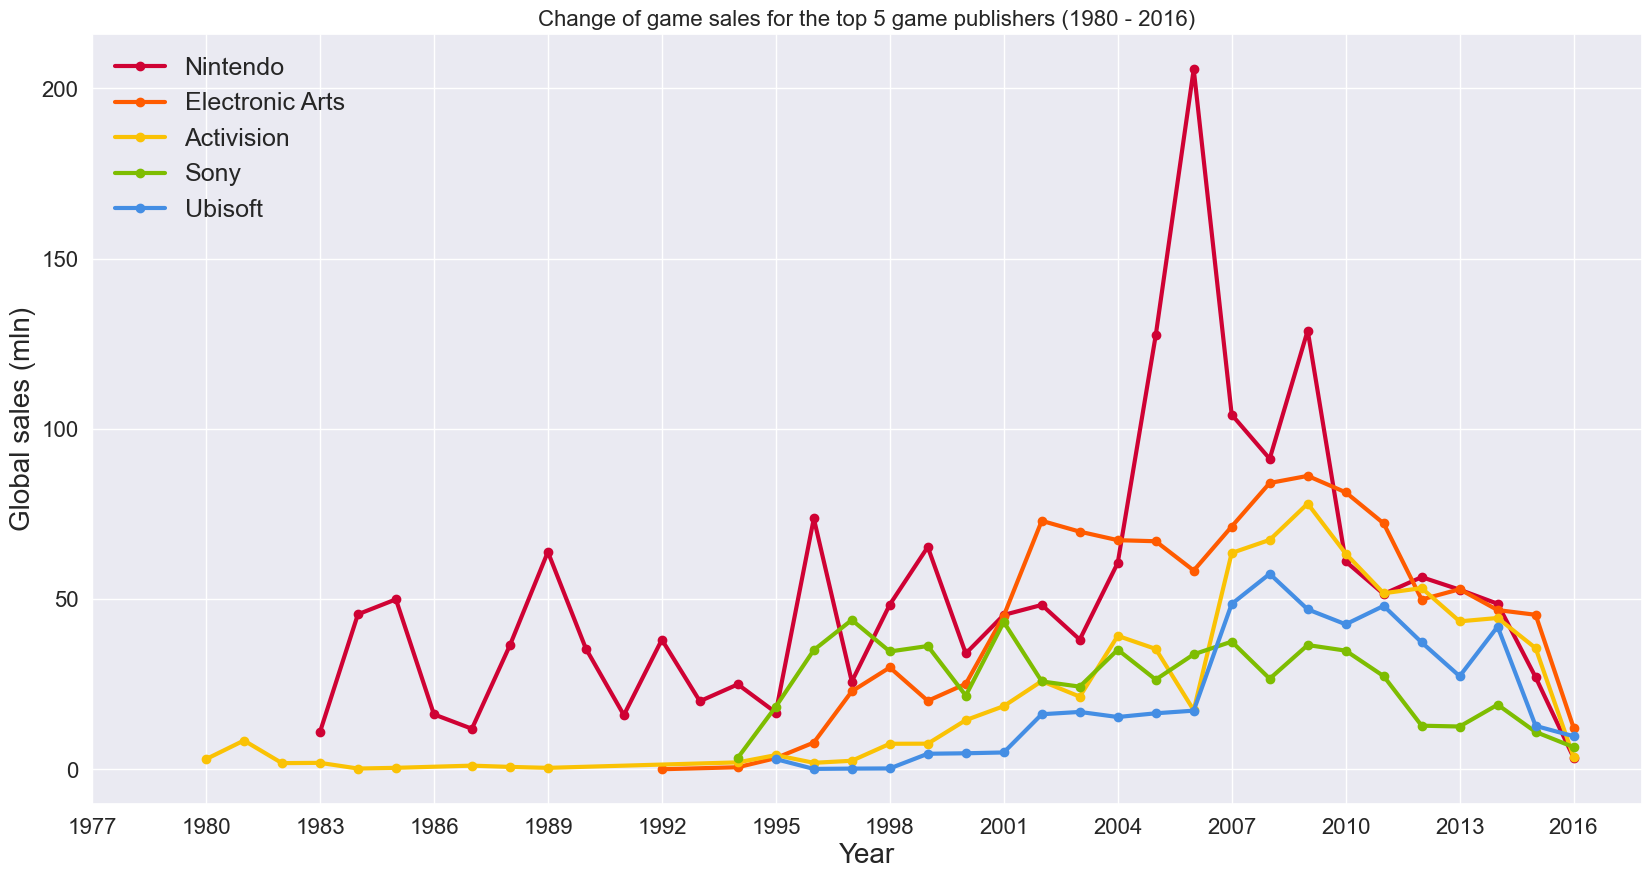

In [25]:
x = np.arange(1977, 2017, 3) # creating a line chart to compare yearly sales of top 5 publishers from 1980 to 2016
xyear = [1977, 1980, 1983, 1986, 1989, 1992, 1995, 1998, 2001, 2004, 2007, 2010, 2013, 2016]

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(nin_year, nintendo_sales, linewidth = 3, label = "Nintendo", marker = "o", color = "#cf0234")
ax.plot(ea_year, ea_sales, linewidth = 3, label = "Electronic Arts", marker = "o", color = "#ff5b00")
ax.plot(act_year, act_sales, linewidth = 3, label = "Activision", marker = "o", color = "#fac205")
ax.plot(sony_year, sony_sales, linewidth = 3, label = "Sony", marker = "o", color = "#7ebd01")
ax.plot(ubi_year, ubi_sales, linewidth = 3, label = "Ubisoft", marker = "o", color = "#448ee4")

ax.set_xticks(x)
ax.set_xticklabels(xyear)

sns.set_theme(style='darkgrid')
sns.set_context("notebook")

ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Global sales (mln)', fontsize=20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_title("Change of game sales for the top 5 game publishers (1980 - 2016)", fontsize = 16)
ax.legend(loc=2, prop={'size': 18})
plt.show()

05 | What games put Nintendo above all other publishers in 2006 and 2009?

In [ ]:
game_sales = pd.read_csv("vgsales.csv", sep = ",") #reading a csv with pandas to get the game sales table with data
game_salesN = game_sales.dropna()
game_salesN["Year"] = game_salesN["Year"].apply(int) # at first, the years were read as floats, so I had to change them into integers

game_salesN.head()

In [27]:
nintendo_sales = game_salesN[["Name", "Year", "Publisher", "Global_Sales"]] # selecting only the columns I require
nintendo_sales.head()

,Name,Year,Publisher,Global_Sales
0,Wii Sports,2006,Nintendo,82.74
1,Super Mario Bros.,1985,Nintendo,40.24
2,Mario Kart Wii,2008,Nintendo,35.82
3,Wii Sports Resort,2009,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,1996,Nintendo,31.37


In [28]:
nintendo_sales2006 = nintendo_sales[(nintendo_sales["Publisher"] == "Nintendo") & (nintendo_sales["Year"] == 2006)] #selecting only Nintendo sales in 2006
nin2006 = nintendo_sales2006.head(5) # only the top 5 games

In [29]:
nintendo_sales2009 = nintendo_sales[(nintendo_sales["Publisher"] == "Nintendo") & (nintendo_sales["Year"] == 2009)] #and in 2009
nin2009 = nintendo_sales2009.head(5) # top 5

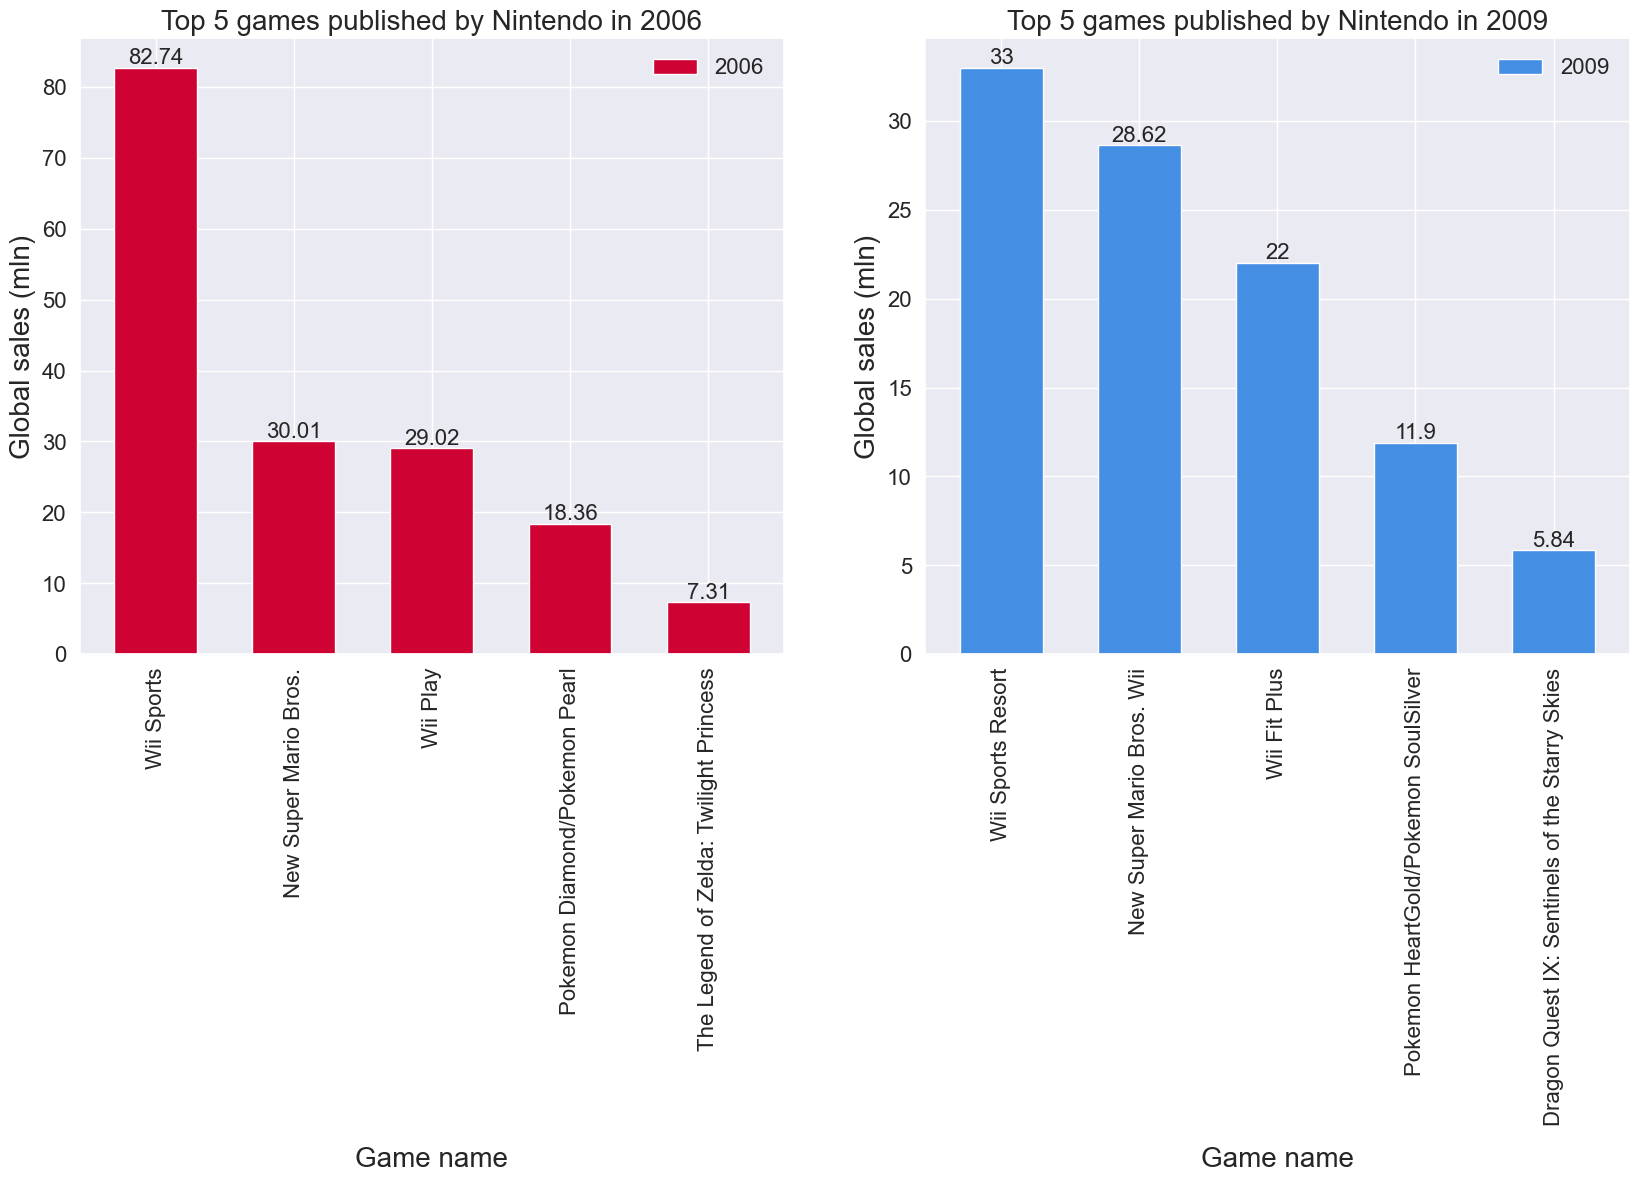

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8), gridspec_kw={'width_ratios':[1,1]}) # two bar charts showcasing the top 5 games in 2006 and 2009

w = 0.6

nin2006.plot(kind = "bar", x = "Name", y = "Global_Sales", color = "#cf0234", label = "2006", width = w, ax = ax1)
nin2009.plot(kind = "bar", x = "Name", y = "Global_Sales", color = "#448ee4", label = "2009", width = w, ax = ax2)

for container in ax1.containers:
    ax1.bar_label(container, fontsize = 16)

ax1.xaxis.set_label_coords(0.5, -0.8)

ax1.set_xlabel('Game name', fontsize=20)
ax1.set_ylabel('Global sales (mln)', fontsize=20)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_title("Top 5 games published by Nintendo in 2006", fontsize = 20)
ax1.legend(loc=1, prop={'size': 16})

for container in ax2.containers:
    ax2.bar_label(container, fontsize = 16)

ax2.xaxis.set_label_coords(0.5, -0.8)

ax2.set_xlabel('Game name', fontsize=20)
ax2.set_ylabel('Global sales (mln)', fontsize=20)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_title("Top 5 games published by Nintendo in 2009", fontsize = 20)
ax2.legend(loc=1, prop={'size': 16})